In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# paths for the three dfs

df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)

In [3]:

df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


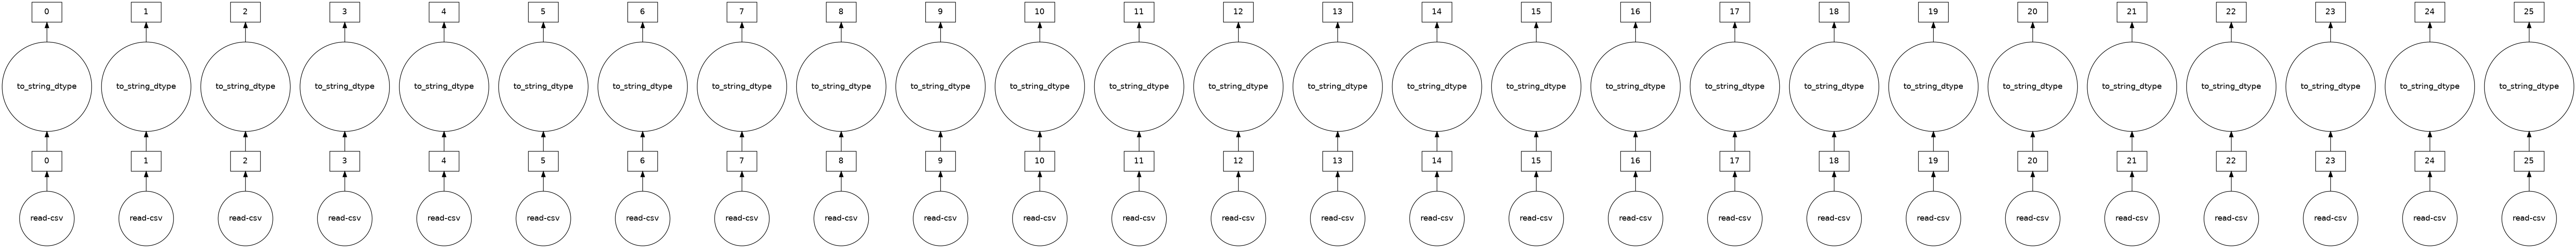

In [4]:
# visualize the chunks using the task graph

df_jan.visualize(tasks=True)

In [5]:


# shape of all the three datasets

print("Shape of january dataset", df_jan.shape)
print("Shape of february dataset", df_feb.shape)
print("Shape of march dataset", df_mar.shape)



Shape of january dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(59201f9)).size() // 19, dtype=int64>, 19)
Shape of february dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(8e238e0)).size() // 19, dtype=int64>, 19)
Shape of march dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(5c365ba)).size() // 19, dtype=int64>, 19)


In [6]:
# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type'])

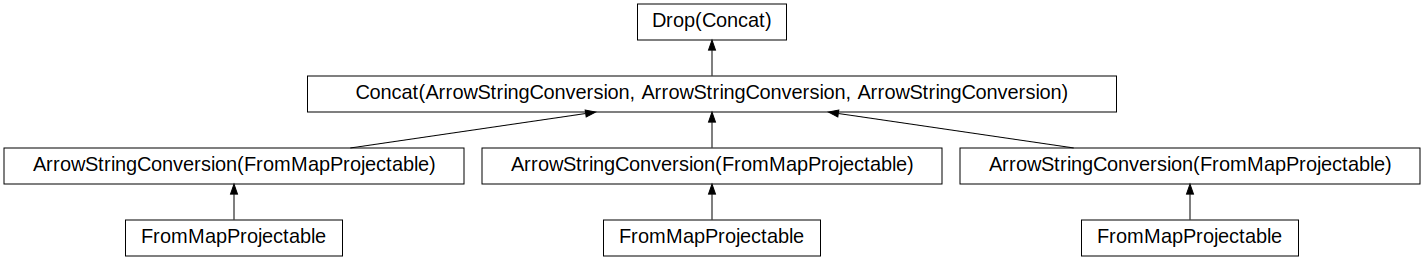

In [7]:
df_final.visualize()

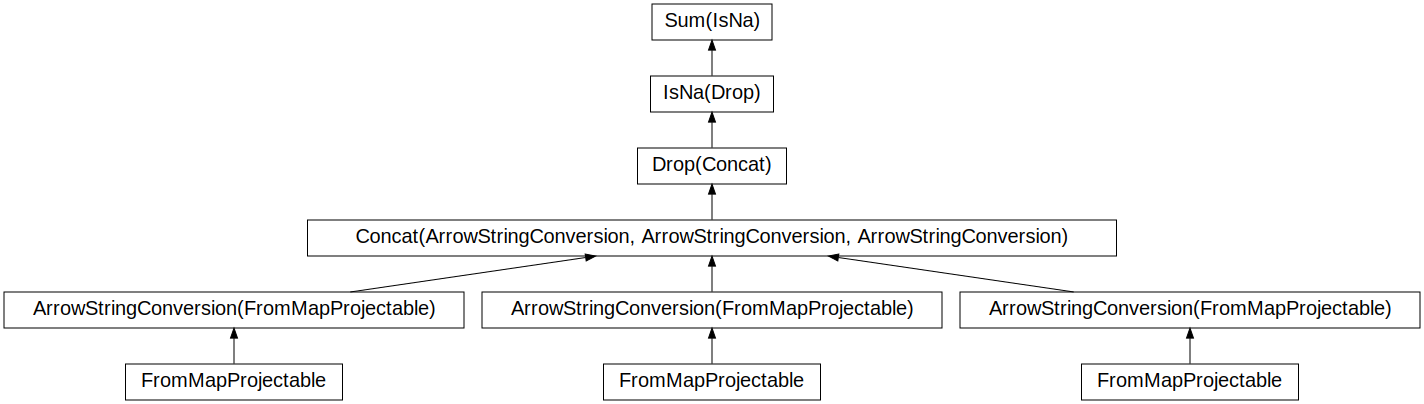

In [8]:


df_final.isna().sum().visualize()



In [9]:
df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [10]:

df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [11]:
sns.set_style("whitegrid")

In [12]:
df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


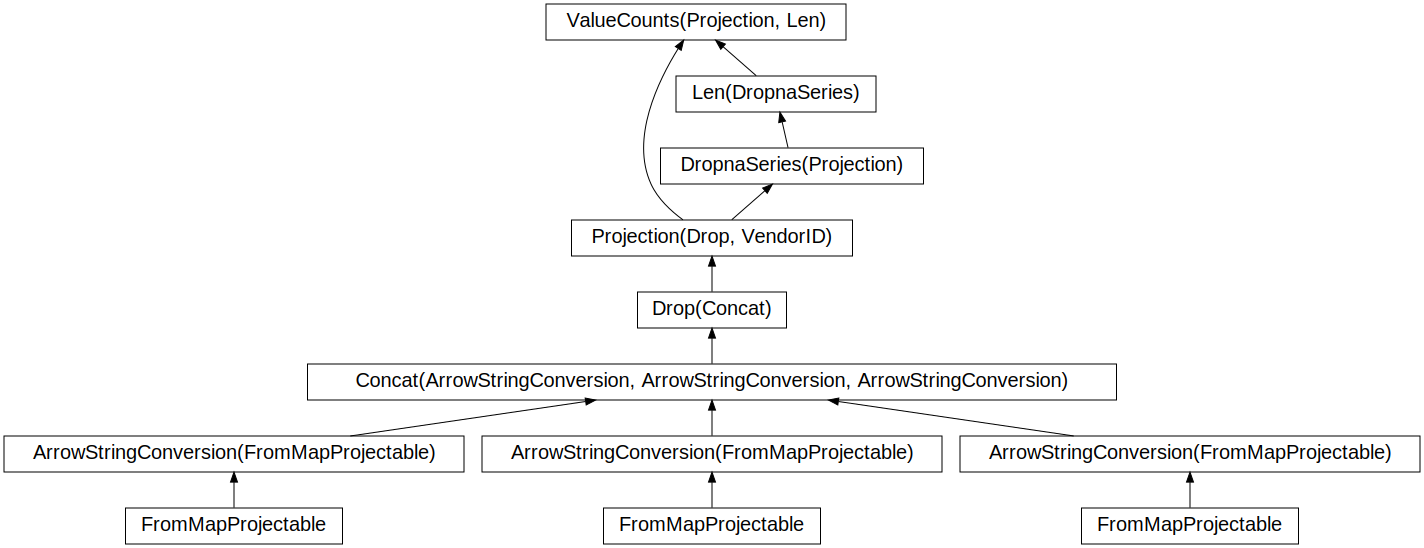

In [13]:
df_final["VendorID"].value_counts(normalize=True).visualize()

In [14]:


# pie chart of vendor share in NYC

vendor_share = (
    df_final["VendorID"]
    .value_counts(normalize=True)
    .compute()
)



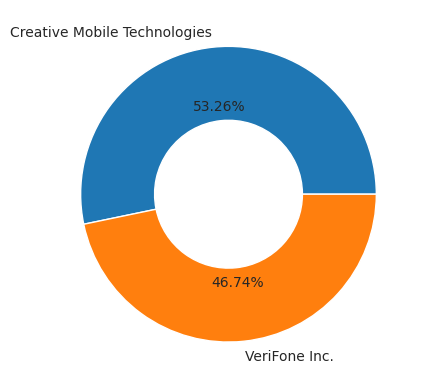

In [15]:
# donut chart

plt.pie(vendor_share, labels=["Creative Mobile Technologies","VeriFone Inc."], autopct="%.2f%%",
       radius=1, wedgeprops=dict(width=0.5, edgecolor="w"))
plt.show()

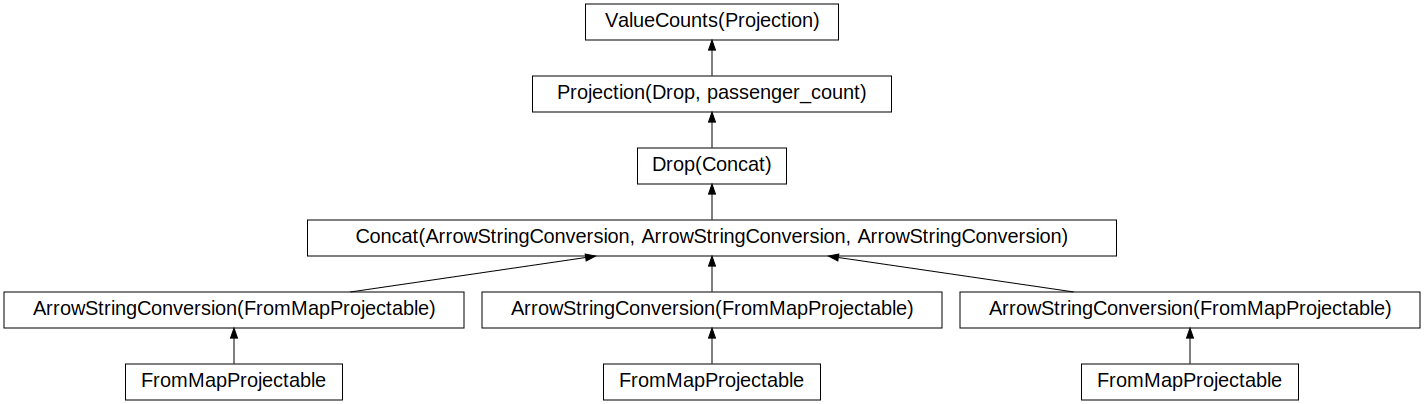

In [16]:
df_final["passenger_count"].value_counts().visualize()

In [17]:
passenger_count = df_final["passenger_count"].value_counts().compute()

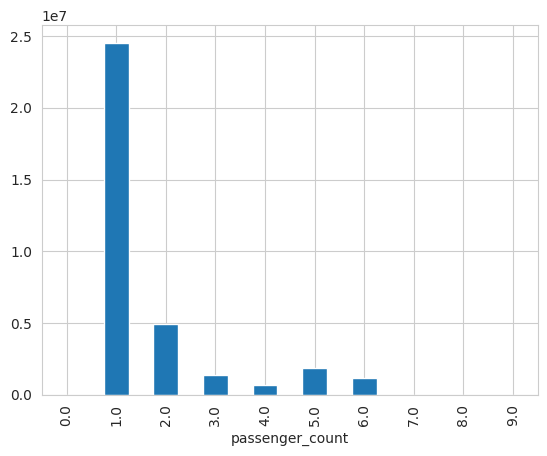

In [18]:
passenger_count.sort_index().plot(kind="bar")
plt.show()

In [19]:
percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [20]:
percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")


The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 8.3


In [21]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [22]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")


The trip distance value for 90th percentile is 8.3
The trip distance value for 91th percentile is 8.91
The trip distance value for 92th percentile is 9.53
The trip distance value for 93th percentile is 10.2
The trip distance value for 94th percentile is 10.95
The trip distance value for 95th percentile is 12.1
The trip distance value for 96th percentile is 14.680000000000582
The trip distance value for 97th percentile is 16.91
The trip distance value for 98th percentile is 17.95
The trip distance value for 99th percentile is 19.375500000000464
The trip distance value for 100th percentile is 19072628.8


<Axes: ylabel='fare_amount'>

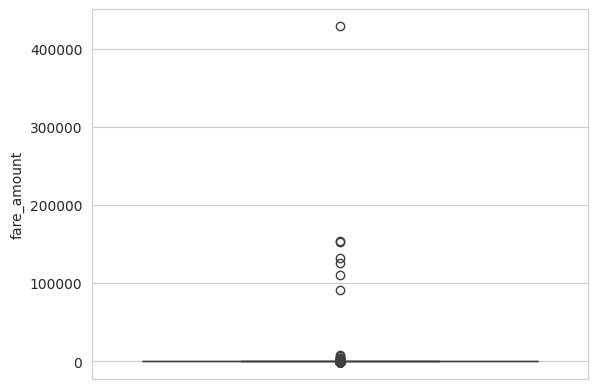

In [23]:
# boxplot for the fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute())


In [24]:
# percentile values for fare amount

percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")


The fare amount value for 10th percentile is 5.0
The fare amount value for 20th percentile is 6.0
The fare amount value for 30th percentile is 7.5
The fare amount value for 40th percentile is 8.5
The fare amount value for 50th percentile is 10.0
The fare amount value for 60th percentile is 11.5
The fare amount value for 70th percentile is 14.0
The fare amount value for 80th percentile is 18.0
The fare amount value for 90th percentile is 27.0
The fare amount value for 100th percentile is 429496.72


In [25]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")


The fare amount value for 90th percentile is 27.0
The fare amount value for 91th percentile is 29.0
The fare amount value for 92th percentile is 30.5
The fare amount value for 93th percentile is 33.0
The fare amount value for 94th percentile is 35.5
The fare amount value for 95th percentile is 40.0
The fare amount value for 96th percentile is 49.5
The fare amount value for 97th percentile is 52.0
The fare amount value for 98th percentile is 52.0
The fare amount value for 99th percentile is 52.0
The fare amount value for 100th percentile is 429496.72


In [26]:
# unique values

rate_code_ids = (
    df_final.loc[:,"RatecodeID"]
    .value_counts()
    .compute()
)

In [27]:
rate_code_ids.sort_index()

RatecodeID
1.0     33627000
2.0       697595
3.0        56169
4.0        14459
5.0       103481
6.0          320
99.0         835
Name: count, dtype: int64

In [28]:
# unique values in rate code column

print(rate_code_ids.sort_index().index.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]


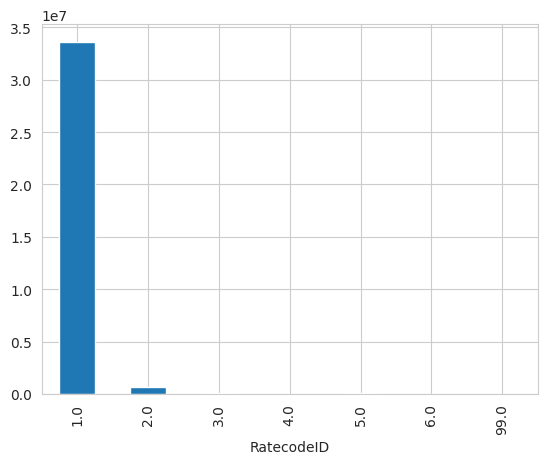

In [29]:
# plot the bar plot to display the distribution of categories

rate_code_ids.sort_index().plot(kind="bar")
plt.show()

In [30]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


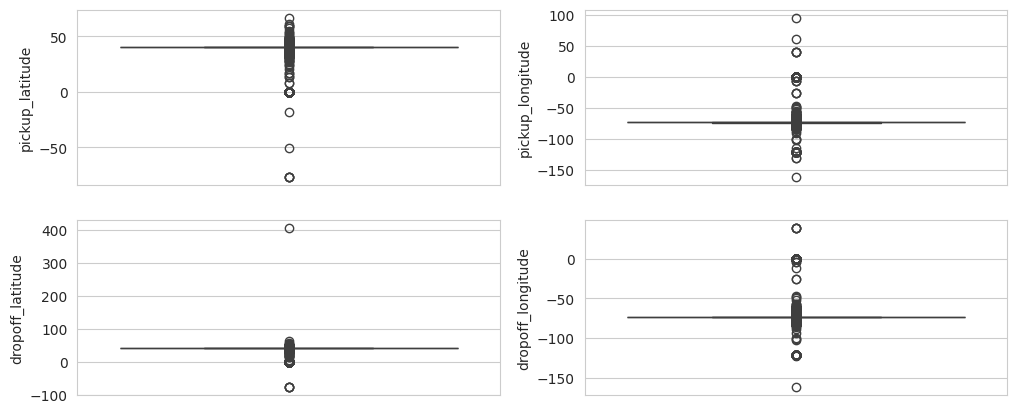

In [31]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2])


<Axes: xlabel='count', ylabel='store_and_fwd_flag'>

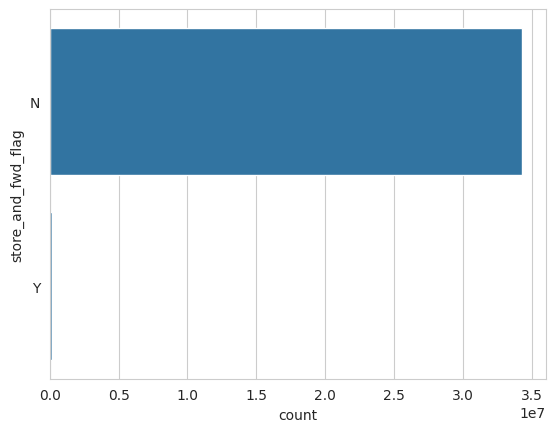

In [32]:
# count plot

sns.countplot(df_final["store_and_fwd_flag"].compute())

In [33]:
# convert the columns to datetime

df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")


In [34]:
# create new columns

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour


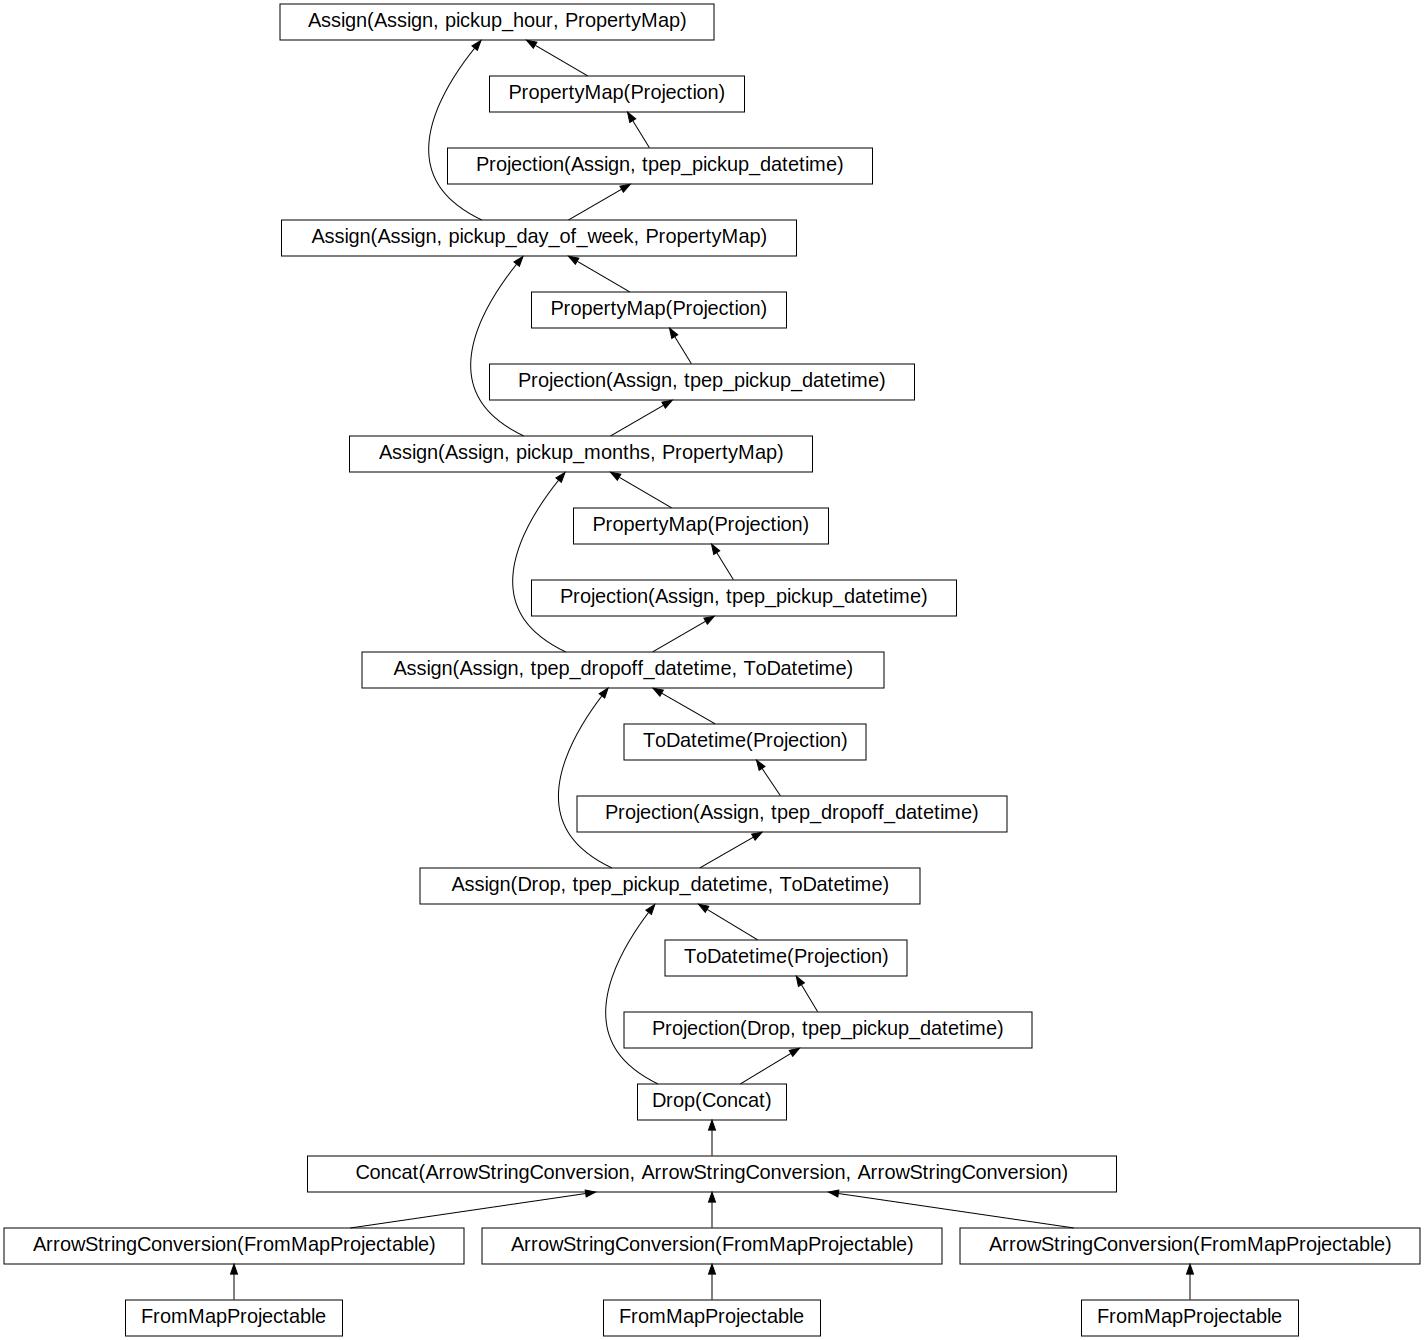

In [35]:
df_final.visualize()


In [36]:
# plot the number of pickups

pickups_every_3_days = (
                            df_final
                            .set_index('tpep_pickup_datetime')
                            .resample("3D")
                            .size()
                            .compute()
)

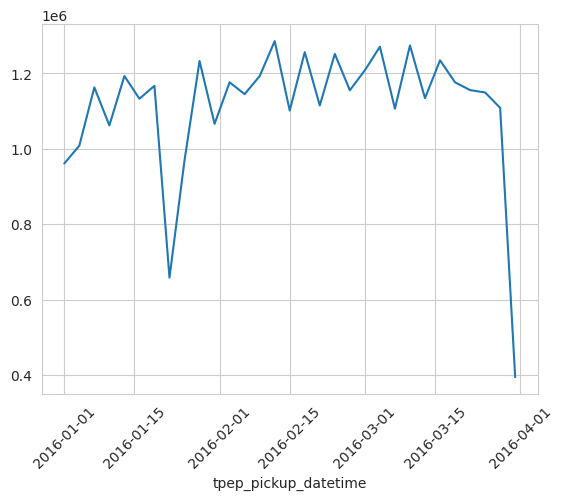

In [37]:
# plot the graph of pickups

sns.lineplot(pickups_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [38]:
# pickups for each hour of the day

pickups_each_hour = (
    df_final
    .groupby(["pickup_hour","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

In [39]:
pickups_each_hour = pickups_each_hour.reset_index()


In [40]:
pickups_each_hour.rename(columns={"VendorID":"Number of Pickups"},inplace=True)


In [41]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [42]:
pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)


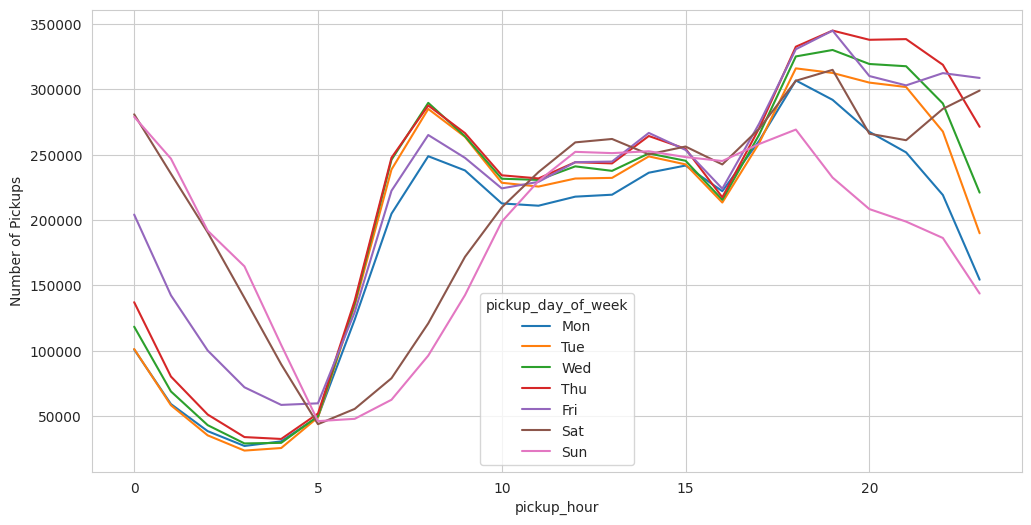

In [43]:
# plot the lineplot

fig = plt.figure(figsize=(12,6))

sns.lineplot(pickups_each_hour, x="pickup_hour", y="Number of Pickups", 
             hue="pickup_day_of_week",hue_order=day_names)

plt.show()